<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [37]:
# Importação do BeautifulSoup para manipular arquivos XML
from bs4 import BeautifulSoup
import pandas as pd

# Nome dos arquivos
NOME_ARQUIVO_ESTADOS_BRUTO = 'estados-bruto.xml'
NOME_ARQUIVO_ESTADOS_LIMPO = 'estados-limpo.csv'

# Carregar o arquivo XML
with open(NOME_ARQUIVO_ESTADOS_BRUTO, 'r', encoding='utf-8') as f:
    fonte = BeautifulSoup(f, features="xml")

In [38]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8"?>
<ESTADOS>
<ESTADO>
<ID>1</ID>
<NOME>ACRE</NOME>
<IDCAPITAL>16</IDCAPITAL>
<SIGLA>AC</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>2</ID>
<NOME>ALAGOAS</NOME>
<IDCAPITAL>68</IDCAPITAL>
<SIGLA>AL</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>3</ID>
<NOME>AMAPA</NOME>
<IDCAPITAL>131</IDCAPITAL>
<SIGLA>AP</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>4</ID>
<NOME>AMAZONAS</NOME>
<IDCAPITAL>178</IDCAPITAL>
<SIGLA>AM</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>5</ID>
<NOME>BAHIA</NOME>
<IDCAPITAL>536</IDCAPITAL>
<SIGLA>BA</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>6</ID>
<NOME>CEARA</NOME>
<IDCAPITAL>676</IDCAPITAL>
<SIGLA>CE</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>7</ID>
<NOME>DISTRITO FEDERAL</NOME>
<IDCAPITAL>916</IDCAPITAL>
<SIGLA>DF</SIGLA>
<REGIAO>CENTRO-OESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>8</ID>
<NOME>ESPIRITO SANTO</NOME>
<IDCAPITAL>879</IDCAPITAL>
<SIGLA>ES</SIGLA>
<REGIAO>SU

In [23]:
# Extrair dados do arquivo XML
estados = []
for estado in fonte.find_all('ESTADO'):
    nome = estado.find('NOME').text
    sigla = estado.find('SIGLA').text
    regiao = estado.find('REGIAO').text
    estados.append([nome, sigla, regiao])

In [24]:
# Criar DataFrame e salvar como CSV
df_estados = pd.DataFrame(estados, columns=['estado', 'sigla', 'regiao'])
df_estados.to_csv(NOME_ARQUIVO_ESTADOS_LIMPO, sep=';', index=False)

# Visualizar os dados extraídos
df_estados.head()

,estado,sigla,regiao
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE


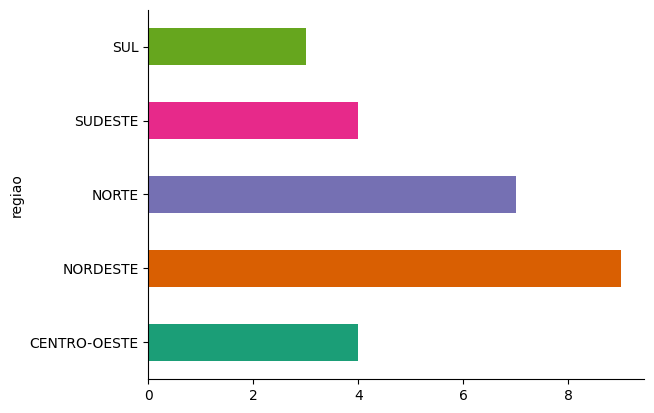

In [25]:
# @title regiao

from matplotlib import pyplot as plt
import seaborn as sns
df_estados.groupby('regiao').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [93]:
import pandas as pd
import os

# Nome do arquivo
NOME_ARQUIVO_CIDADES_BRUTO = '/content/cidades-bruto.csv'  # Caminho do arquivo bruto

# Verificar se o arquivo existe
if not os.path.exists(NOME_ARQUIVO_CIDADES_BRUTO):
    raise FileNotFoundError(f"O arquivo {NOME_ARQUIVO_CIDADES_BRUTO} não foi encontrado.")
else:
    print(f"Arquivo {NOME_ARQUIVO_CIDADES_BRUTO} encontrado.")

# Carregar o arquivo CSV
df_cidades = pd.read_csv(NOME_ARQUIVO_CIDADES_BRUTO, delimiter=',', encoding='utf-8')

# Exibir o cabeçalho do DataFrame
print("Cabeçalho do arquivo carregado:")
print(df_cidades.head())

Arquivo /content/cidades-bruto.csv encontrado.
Cabeçalho do arquivo carregado:
                                               FID   gid                 UF  \
0  vw_pib_percapita.fid-4514e25a_17aaa325034_-258f   215              BAHIA   
1  vw_pib_percapita.fid-4514e25a_17aaa325034_-258e   306  RIO GRANDE DO SUL   
2  vw_pib_percapita.fid-4514e25a_17aaa325034_-258d   900     ESPIRITO SANTO   
3  vw_pib_percapita.fid-4514e25a_17aaa325034_-258c  3613       MINAS GERAIS   
4  vw_pib_percapita.fid-4514e25a_17aaa325034_-258b  1028              PIAUÍ   

        nome   Censo           PIB  Pop_est_2009  PIB_percapita  \
0   Tremedal  2010.0  5.788399e+04         18433    3140.239990   
1     Turuçu  2010.0  4.572388e+04          4000   11430.969727   
2    Vitória  2010.0  1.978263e+07        320156   61790.589844   
3  Jacutinga  2010.0  2.478160e+05         21424   11567.209961   
4    Nazária  2010.0  2.095138e+04          7895    2653.750000   

                          Descrição        

In [94]:
import pandas as pd
import os

# Nome dos arquivos
NOME_ARQUIVO_CIDADES_BRUTO = '/content/cidades-bruto.csv'  # Caminho do arquivo bruto na máquina virtual
NOME_ARQUIVO_CIDADES_LIMPO = '/content/cidades-limpo.csv'  # Caminho do arquivo limpo a ser salvo

# Função para verificar se o arquivo bruto existe na máquina virtual
def verificar_arquivo(nome_arquivo):
    if not os.path.exists(nome_arquivo):
        raise FileNotFoundError(f"O arquivo {nome_arquivo} não foi encontrado na máquina virtual do Google Colab.")
    print(f"Arquivo {nome_arquivo} encontrado.")

# Função para carregar e processar os dados conforme as especificações
def processar_dados(nome_arquivo):
    try:
        # Carregar o arquivo cidades-bruto.csv com delimitador ','
        df_cidades = pd.read_csv(nome_arquivo, delimiter=',', encoding='utf-8')

        # Listar as colunas disponíveis para depuração
        print("\nColunas disponíveis no arquivo:")
        print(df_cidades.columns.tolist())

        # Garantir que a coluna 'Censo' existe dinamicamente
        coluna_censo = next((col for col in df_cidades.columns if 'Censo' in col), None)
        if not coluna_censo:
            raise KeyError("A coluna 'Censo' não foi encontrada no arquivo.")

        # Filtrar apenas os dados do censo de 2010
        df_cidades_2010 = df_cidades[df_cidades[coluna_censo] == 2010]

        # Colunas relevantes esperadas
        colunas_relevantes = ['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']
        for coluna in colunas_relevantes:
            if coluna not in df_cidades.columns:
                raise KeyError(f"A coluna '{coluna}' esperada não está presente no arquivo.")

        # Filtrar apenas as colunas relevantes
        df_cidades_2010 = df_cidades_2010[colunas_relevantes]

        # Renomear as colunas para os nomes finais
        df_cidades_2010.rename(columns={
            'UF': 'estado',
            'nome': 'cidade',
            'Pop_est_2009': 'populacao',
            'PIB_percapita': 'pib_percapita',
            'PIB': 'pib'
        }, inplace=True)

        # Retornar o DataFrame final processado
        return df_cidades_2010

    except Exception as e:
        print(f"Erro ao processar o arquivo: {e}")
        return pd.DataFrame()

# Função para salvar os dados processados no arquivo final
def salvar_dados(df, nome_arquivo_destino):
    try:
        # Salvar os dados no arquivo cidades-limpo.csv com delimitador ';'
        df.to_csv(nome_arquivo_destino, sep=';', index=False)
        print(f"Dados processados salvos no arquivo {nome_arquivo_destino}.")
    except Exception as e:
        print(f"Erro ao salvar os dados: {e}")

# Função para executar o processo completo
def executar_item_1_2():
    try:
        # Verificar se o arquivo bruto existe
        verificar_arquivo(NOME_ARQUIVO_CIDADES_BRUTO)

        # Processar os dados do arquivo bruto
        df_resultado = processar_dados(NOME_ARQUIVO_CIDADES_BRUTO)

        # Exibir os dados processados
        if not df_resultado.empty:
            print("\nPrimeiras linhas do DataFrame processado:")
            print(df_resultado.head())

            # Salvar os dados no arquivo final apenas após o processamento
            salvar_dados(df_resultado, NOME_ARQUIVO_CIDADES_LIMPO)
        else:
            print("\nNenhum dado foi processado.")
    except Exception as e:
        print(f"Erro durante a execução: {e}")

# Executar o processo completo
executar_item_1_2()

Arquivo /content/cidades-bruto.csv encontrado.

Colunas disponíveis no arquivo:
['FID', 'gid', 'UF', 'nome', 'Censo', 'PIB', 'Pop_est_2009', 'PIB_percapita', 'Descrição', 'legenda', 'classe', 'geom']

Primeiras linhas do DataFrame processado:
              estado     cidade           pib  populacao  pib_percapita
0              BAHIA   Tremedal  5.788399e+04      18433    3140.239990
1  RIO GRANDE DO SUL     Turuçu  4.572388e+04       4000   11430.969727
2     ESPIRITO SANTO    Vitória  1.978263e+07     320156   61790.589844
3       MINAS GERAIS  Jacutinga  2.478160e+05      21424   11567.209961
4              PIAUÍ    Nazária  2.095138e+04       7895    2653.750000
Dados processados salvos no arquivo /content/cidades-limpo.csv.


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [95]:
# Nome do arquivo combinado
NOME_ARQUIVO_BRASIL = '/content/brasil.csv'  # Caminho para salvar o arquivo combinado

# Função para combinar os dados de cidades-limpo.csv e estados-limpo.csv
def combinar_dados_brasil(arquivo_cidades, arquivo_estados, arquivo_saida):
    try:
        # Carregar os arquivos limpos
        df_cidades = pd.read_csv(arquivo_cidades, delimiter=';', encoding='utf-8')
        df_estados = pd.read_csv(arquivo_estados, delimiter=';', encoding='utf-8')

        # Combinar os dois DataFrames pelo campo "estado"
        df_brasil = pd.merge(df_cidades, df_estados, on='estado', how='inner')

        # Salvar o DataFrame combinado no arquivo de saída
        df_brasil.to_csv(arquivo_saida, sep=';', index=False)
        print(f"Dados combinados salvos no arquivo {arquivo_saida}.")

        # Retornar o DataFrame combinado para visualização
        return df_brasil

    except Exception as e:
        print(f"Erro ao combinar os dados: {e}")
        return pd.DataFrame()

# Executar a combinação dos dados
df_brasil = combinar_dados_brasil(
    arquivo_cidades=NOME_ARQUIVO_CIDADES_LIMPO,
    arquivo_estados='/content/estados-limpo.csv',  # Arquivo de estados limpo
    arquivo_saida=NOME_ARQUIVO_BRASIL
)

# Exibir as primeiras linhas do DataFrame combinado
if not df_brasil.empty:
    print("\nPrimeiras linhas do arquivo combinado Brasil:")
    print(df_brasil.head())

Dados combinados salvos no arquivo /content/brasil.csv.

Primeiras linhas do arquivo combinado Brasil:
              estado      cidade           pib  populacao  pib_percapita  \
0              BAHIA    Tremedal  5.788399e+04      18433    3140.239990   
1  RIO GRANDE DO SUL      Turuçu  4.572388e+04       4000   11430.969727   
2     ESPIRITO SANTO     Vitória  1.978263e+07     320156   61790.589844   
3       MINAS GERAIS   Jacutinga  2.478160e+05      21424   11567.209961   
4       MINAS GERAIS  Pedra Azul  1.875237e+05      26000    7212.450195   

  sigla    regiao  
0    BA  NORDESTE  
1    RS       SUL  
2    ES   SUDESTE  
3    MG   SUDESTE  
4    MG   SUDESTE  


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [96]:
# Carregar o arquivo combinado Brasil
df_brasil = pd.read_csv(NOME_ARQUIVO_BRASIL, delimiter=';', encoding='utf-8')

# Exibir as primeiras linhas do DataFrame carregado
print("\nPrimeiras linhas do arquivo combinado Brasil carregado:")
print(df_brasil.head())


Primeiras linhas do arquivo combinado Brasil carregado:
              estado      cidade           pib  populacao  pib_percapita  \
0              BAHIA    Tremedal  5.788399e+04      18433    3140.239990   
1  RIO GRANDE DO SUL      Turuçu  4.572388e+04       4000   11430.969727   
2     ESPIRITO SANTO     Vitória  1.978263e+07     320156   61790.589844   
3       MINAS GERAIS   Jacutinga  2.478160e+05      21424   11567.209961   
4       MINAS GERAIS  Pedra Azul  1.875237e+05      26000    7212.450195   

  sigla    regiao  
0    BA  NORDESTE  
1    RS       SUL  
2    ES   SUDESTE  
3    MG   SUDESTE  
4    MG   SUDESTE  


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [97]:
cidades_mais_populosas = df_brasil.nlargest(10, 'populacao')[['cidade', 'populacao']]
print("\n10 Cidades mais populosas do Brasil:")
print(cidades_mais_populosas)


10 Cidades mais populosas do Brasil:
               cidade  populacao
460    Rio de Janeiro    6186710
314          Salvador    2998056
1790         Brasília    2606885
2825   Belo Horizonte    2452617
197            Manaus    1738641
2047           Recife    1561659
572      Porto Alegre    1436123
1576      São Gonçalo     991382
2528           Maceió     936314
2622  Duque de Caxias     872762


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [98]:
menor_pib_percapita_ne = df_brasil[df_brasil['regiao'] == 'NORDESTE'].nsmallest(5, 'pib_percapita')[['cidade', 'pib_percapita']]
print("\n5 Cidades com o menor PIB per capita da região Nordeste:")
print(menor_pib_percapita_ne)


5 Cidades com o menor PIB per capita da região Nordeste:
            cidade  pib_percapita
2737      Caetanos    2440.570068
2806  Novo Triunfo    2497.060059
2039        Matina    2551.989990
918         Traipu    2649.479980
1553      Mansidão    2665.449951


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [99]:
maior_pib_sp = df_brasil[df_brasil['estado'] == 'SÃO PAULO'].nlargest(15, 'pib')[['cidade', 'pib']]
print("\n15 Cidades com maior PIB do estado de São Paulo:")
print(maior_pib_sp)


15 Cidades com maior PIB do estado de São Paulo:
Empty DataFrame
Columns: [cidade, pib]
Index: []


 - Qual é o PIB do estado de Santa Catarina?

In [100]:
pib_sc = df_brasil[df_brasil['estado'] == 'SANTA CATARINA']['pib'].sum()
print("\nPIB total do estado de Santa Catarina:")
print(pib_sc)


PIB total do estado de Santa Catarina:
129806256.75195317


 - Qual é o população da região sul?

In [101]:
populacao_sul = df_brasil[df_brasil['regiao'] == 'SUL']['populacao'].sum()
print("\nPopulação total da região Sul:")
print(populacao_sul)


População total da região Sul:
17032871


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [102]:
pib_percapita_ms = df_brasil[df_brasil['estado'] == 'MATO GROSSO DO SUL']['pib_percapita'].mean()
print("\nPIB per capita médio das cidades do Mato Grosso do Sul:")
print(pib_percapita_ms)


PIB per capita médio das cidades do Mato Grosso do Sul:
14458.896859975644


 - Qual é a população do Brasil?

In [103]:
populacao_brasil = df_brasil['populacao'].sum()
print("\nPopulação total do Brasil:")
print(populacao_brasil)


População total do Brasil:
101885500


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

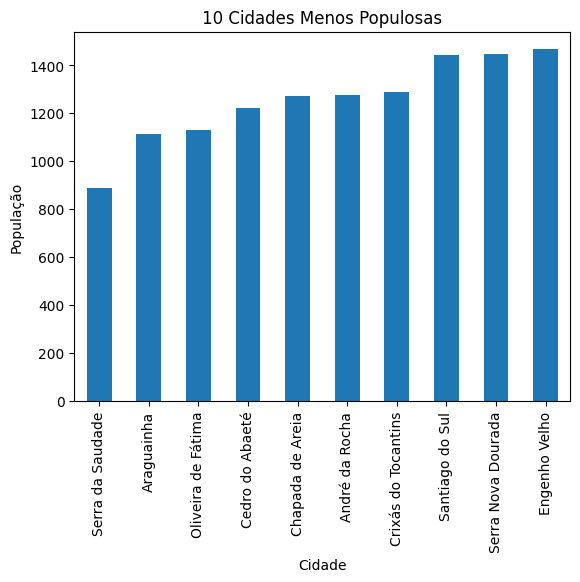

In [104]:
menos_populosas = df_brasil.nsmallest(10, 'populacao')[['cidade', 'populacao']]
menos_populosas.plot(kind='bar', x='cidade', y='populacao', title='10 Cidades Menos Populosas', legend=False)
plt.ylabel('População')
plt.xlabel('Cidade')
plt.show()

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

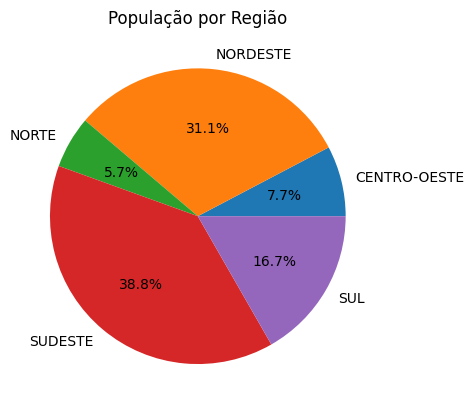

In [105]:
populacao_regiao = df_brasil.groupby('regiao')['populacao'].sum()
populacao_regiao.plot(kind='pie', autopct='%1.1f%%', title='População por Região')
plt.ylabel('')
plt.show()